# 게임 스타트

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if result.multi_hand_landmarks is not None:
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z]

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                       v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                       v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)

        elapsed_time = time.time() - start_time
        if elapsed_time >= interval:
            start_time = time.time()

            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                right_gesture = rps_result[1]['rps']

                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)

        if left_score == 5 or right_score == 5:
            winner = 'Right Player' if left_score == 5 else 'Left Player'
            
            cv2.putText(img, text=f'{winner} Wins!', org=(int(img.shape[1] / 2) - 50, int(img.shape[0] / 2)),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3)
            
    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


#  뉴

In [ ]:

import mediapipe

In [7]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if result.multi_hand_landmarks is not None:
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z]

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                       v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                       v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)

        elapsed_time = time.time() - start_time
        if elapsed_time >= interval:
            start_time = time.time()

            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                right_gesture = rps_result[1]['rps']

                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)
        
        
        
        if left_score == 2 or right_score == 2:
            pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
            pygame.mixer.music.stop()
            pygame.mixer.music.play(0, 0.0)

            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
            


    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

In [7]:
import pygame

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if result.multi_hand_landmarks is not None:
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z]

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                       v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                       v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



        elapsed_time = time.time() - start_time
        if elapsed_time >= interval:
            start_time = time.time()
            # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
            right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
            left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                right_gesture = rps_result[1]['rps']

                # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                left_gesture_count[left_gesture] += 1
                right_gesture_count[right_gesture] += 1

                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)
        
        
        
        if left_score == 2 or right_score == 2:
            pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
            pygame.mixer.music.stop()
            pygame.mixer.music.play(0, 0.0)

            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)

            # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)

            # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'Right Player - Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 50),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

            # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'Left Player - Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 100),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)
    

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break
    
    
    

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
#2

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for i in range(3):
        if result.multi_hand_landmarks is not None:
            rps_result = []

            for res in result.multi_hand_landmarks:
                joint = np.zeros((21, 3))
                for j, lm in enumerate(res.landmark):
                    joint[j] = [lm.x, lm.y, lm.z]

                v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
                v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
                v = v2 - v1
                v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

                angle = np.arccos(np.einsum('nt,nt->n',
                                        v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                        v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

                angle = np.degrees(angle)

                data = np.array([angle], dtype=np.float32)
                ret, results, neighbours, dist = knn.findNearest(data, 3)
                idx = int(results[0][0])

                if idx in rps_gesture.keys():
                    org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                    cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                    rps_result.append({
                        'rps': rps_gesture[idx],
                        'org': org
                    })

                mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



            elapsed_time = time.time() - start_time
            if elapsed_time >= interval:
                start_time = time.time()
                # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
                right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
                left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

                if len(rps_result) >= 2:
                    left_gesture = rps_result[0]['rps']
                    right_gesture = rps_result[1]['rps']

                    # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                    left_gesture_count[left_gesture] += 1
                    right_gesture_count[right_gesture] += 1

                    if left_gesture == 'rock':
                        if right_gesture == 'scissors':
                            left_score += 1
                        elif right_gesture == 'paper':
                            right_score += 1
                    elif left_gesture == 'paper':
                        if right_gesture == 'rock':
                            left_score += 1
                        elif right_gesture == 'scissors':
                            right_score += 1
                    elif left_gesture == 'scissors':
                        if right_gesture == 'rock':
                            right_score += 1
                        elif right_gesture == 'paper':
                            left_score += 1

            cv2.putText(img, text=f'Left Score: {left_score} | Right Score: {right_score}',
                        org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                        color=(255, 255, 255), thickness=2)
            
            
            
            if left_score == 2 or right_score == 2:
                pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
                pygame.mixer.music.stop()
                pygame.mixer.music.play(0, 0.0)

                winner = 'Right Player' if left_score == 2 else 'Left Player'
                cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
                
                # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
                winner = 'Right Player' if left_score == 2 else 'Left Player'
                cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
                cv2.waitKey(30)

                # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
                cv2.putText(img, text=f'<Right Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
                org=(50, int(img.shape[0] / 2) + 50),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
                cv2.waitKey(30)
                
                # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
                cv2.putText(img, text=f'<Left Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
                org=(50, int(img.shape[0] / 2) + 100),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
                cv2.waitKey(30)
                




                

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
# 3

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # for i in range(3):
        if result.multi_hand_landmarks is not None:
            rps_result = []

            for res in result.multi_hand_landmarks:
                joint = np.zeros((21, 3))
                for j, lm in enumerate(res.landmark):
                    joint[j] = [lm.x, lm.y, lm.z]

                v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
                v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
                v = v2 - v1
                v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

                angle = np.arccos(np.einsum('nt,nt->n',
                                        v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                        v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

                angle = np.degrees(angle)

                data = np.array([angle], dtype=np.float32)
                ret, results, neighbours, dist = knn.findNearest(data, 3)
                idx = int(results[0][0])

                if idx in rps_gesture.keys():
                    org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                    cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                    rps_result.append({
                        'rps': rps_gesture[idx],
                        'org': org
                    })

                mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



            elapsed_time = time.time() - start_time
            if elapsed_time >= interval:
                start_time = time.time()
                # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
                right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
                left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

                if len(rps_result) >= 2:
                    left_gesture = rps_result[0]['rps']
                    right_gesture = rps_result[1]['rps']

                    # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                    left_gesture_count[left_gesture] += 1
                    right_gesture_count[right_gesture] += 1

                    if left_gesture == 'rock':
                        if right_gesture == 'scissors':
                            left_score += 1
                        elif right_gesture == 'paper':
                            right_score += 1
                    elif left_gesture == 'paper':
                        if right_gesture == 'rock':
                            left_score += 1
                        elif right_gesture == 'scissors':
                            right_score += 1
                    elif left_gesture == 'scissors':
                        if right_gesture == 'rock':
                            right_score += 1
                        elif right_gesture == 'paper':
                            left_score += 1

            cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                        org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                        color=(255, 255, 255), thickness=2)

            
            
            if left_score == 2 or right_score == 2:
                pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
                pygame.mixer.music.stop()
                pygame.mixer.music.play(0, 0.0)

                winner = 'Right Player' if left_score == 2 else 'Left Player'
                cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
                cv2.waitKey(5000)
                
                # 게임이 끝나면 초기화
                left_score = 0
                right_score = 0
                left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
                right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

    # # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
    # winner = 'Right Player' if left_score == 2 else 'Left Player'
    # cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
    # fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
    # cv2.waitKey(30)

    # # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
    # cv2.putText(img, text=f'<Right Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
    # org=(50, int(img.shape[0] / 2) + 50),
    # fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
    # cv2.waitKey(30)``
    
    # # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
    # cv2.putText(img, text=f'<Left Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
    # org=(50, int(img.shape[0] / 2) + 100),
    # fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
    # cv2.waitKey(30)
                

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
# 4

In [7]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for i in range(3):
        if result.multi_hand_landmarks is not None:
            rps_result = []

            for res in result.multi_hand_landmarks:
                joint = np.zeros((21, 3))
                for j, lm in enumerate(res.landmark):
                    joint[j] = [lm.x, lm.y, lm.z]

                v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
                v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
                v = v2 - v1
                v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

                angle = np.arccos(np.einsum('nt,nt->n',
                                        v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                        v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

                angle = np.degrees(angle)

                data = np.array([angle], dtype=np.float32)
                ret, results, neighbours, dist = knn.findNearest(data, 3)
                idx = int(results[0][0])

                if idx in rps_gesture.keys():
                    org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                    cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                    rps_result.append({
                        'rps': rps_gesture[idx],
                        'org': org
                    })

                mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



            elapsed_time = time.time() - start_time
            if elapsed_time >= interval:
                start_time = time.time()
                # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
                right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
                left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

                if len(rps_result) >= 2:
                    left_gesture = rps_result[0]['rps']
                    right_gesture = rps_result[1]['rps']

                    # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                    left_gesture_count[left_gesture] += 1
                    right_gesture_count[right_gesture] += 1

                    if left_gesture == 'rock':
                        if right_gesture == 'scissors':
                            left_score += 1
                        elif right_gesture == 'paper':
                            right_score += 1
                    elif left_gesture == 'paper':
                        if right_gesture == 'rock':
                            left_score += 1
                        elif right_gesture == 'scissors':
                            right_score += 1
                    elif left_gesture == 'scissors':
                        if right_gesture == 'rock':
                            right_score += 1
                        elif right_gesture == 'paper':
                            left_score += 1

            cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                        org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                        color=(255, 255, 255), thickness=2)

            
            
            if left_score == 2 or right_score == 2:
                pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
                pygame.mixer.music.stop()
                pygame.mixer.music.play(0, 0.0)

                winner = 'Right Player' if left_score == 2 else 'Left Player'
                cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
                cv2.waitKey(5000)
                
                # 게임이 끝나면 초기화
                left_score = 0
                right_score = 0
                left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
                right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

    # # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
    # winner = 'Right Player' if left_score == 2 else 'Left Player'
    # cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
    # fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
    # cv2.waitKey(30)

    # # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
    # cv2.putText(img, text=f'<Right Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
    # org=(50, int(img.shape[0] / 2) + 50),
    # fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
    # cv2.waitKey(30)
    
    # # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
    # cv2.putText(img, text=f'<Left Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
    # org=(50, int(img.shape[0] / 2) + 100),
    # fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
    # cv2.waitKey(30)
                

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

In [ ]:
# 5

In [4]:
    import cv2
    import mediapipe as mp
    import numpy as np
    import time
    import pygame

    pygame.mixer.init()
    pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
    # pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
    pygame.mixer.music.play()


    max_num_hands = 2
    gesture = {
        0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
        6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
    }
    rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

    # MediaPipe hands model
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(
        max_num_hands=max_num_hands,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5)

    # Gesture recognition model
    file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
    angle = file[:, :-1].astype(np.float32)
    label = file[:, -1].astype(np.float32)
    knn = cv2.ml.KNearest_create()
    knn.train(angle, cv2.ml.ROW_SAMPLE, label)

    cap = cv2.VideoCapture(0)

    left_gesture = None
    right_gesture = None
    left_score = 0
    right_score = 0

    start_time = time.time()
    interval = 3  # seconds

    while cap.isOpened():
        ret, img = cap.read()
        if not ret:
            continue

        img = cv2.flip(img, 1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        result = hands.process(img)

        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        if result.multi_hand_landmarks is not None:
            rps_result = []

            for res in result.multi_hand_landmarks:
                joint = np.zeros((21, 3))
                for j, lm in enumerate(res.landmark):
                    joint[j] = [lm.x, lm.y, lm.z]

                v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
                v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
                v = v2 - v1
                v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

                angle = np.arccos(np.einsum('nt,nt->n',
                                        v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                        v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

                angle = np.degrees(angle)

                data = np.array([angle], dtype=np.float32)
                ret, results, neighbours, dist = knn.findNearest(data, 3)
                idx = int(results[0][0])

                if idx in rps_gesture.keys():
                    org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                    cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                    rps_result.append({
                        'rps': rps_gesture[idx],
                        'org': org
                    })

                mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



            elapsed_time = time.time() - start_time
            if elapsed_time >= interval:
                start_time = time.time()
                # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
                right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
                left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

                if len(rps_result) >= 2:
                    left_gesture = rps_result[0]['rps']
                    right_gesture = rps_result[1]['rps']

                    # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                    left_gesture_count[left_gesture] += 1
                    right_gesture_count[right_gesture] += 1

                    if left_gesture == 'rock':
                        if right_gesture == 'scissors':
                            left_score += 1
                        elif right_gesture == 'paper':
                            right_score += 1
                    elif left_gesture == 'paper':
                        if right_gesture == 'rock':
                            left_score += 1
                        elif right_gesture == 'scissors':
                            right_score += 1
                    elif left_gesture == 'scissors':
                        if right_gesture == 'rock':
                            right_score += 1
                        elif right_gesture == 'paper':
                            left_score += 1

            cv2.putText(img, text=f'Left Score: {left_score} | Right Score: {right_score}',
                        org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                        color=(255, 255, 255), thickness=2)
            
            
            
            if left_score == 2 or right_score == 2:
                pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
                pygame.mixer.music.stop()
                pygame.mixer.music.play(0, 0.0)

                winner = 'Right Player' if left_score == 2 else 'Left Player'
                cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
                
                # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
                winner = 'Right Player' if left_score == 2 else 'Left Player'
                cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
                cv2.waitKey(30)


                # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
                cv2.putText(img, text=f'<Right Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
                org=(50, int(img.shape[0] / 2) + 50),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
                cv2.waitKey(30)
                
                # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
                cv2.putText(img, text=f'<Left Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
                org=(50, int(img.shape[0] / 2) + 100),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
                cv2.waitKey(30)
                    

                

        cv2.imshow('Game', img)
        if cv2.waitKey(1) == ord('q'):
            break

: 

In [ ]:
# 6

In [9]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()

max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0
game_count = 0

start_time = time.time()
interval = 3  # seconds
result_display_time = 5  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if result.multi_hand_landmarks is not None:
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z]

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                        v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                        v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)

        elapsed_time = time.time() - start_time

        if elapsed_time >= interval:
            start_time = time.time()

            # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
            right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
            left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                right_gesture = rps_result[1]['rps']

                # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                left_gesture_count[left_gesture] += 1
                right_gesture_count[right_gesture] += 1

                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)
                    
        if left_score == 2 or right_score == 2:
            pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
            pygame.mixer.music.stop()
            pygame.mixer.music.play(0, 0.0)

            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
            cv2.waitKey(3000)
            game_count += 1
            

            if game_count == 3:
                # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
                cv2.putText(img, text=f'<Right Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
                            org=(50, int(img.shape[0] / 2) + 50),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
                cv2.waitKey(3000)  # 5 seconds

                # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
                cv2.putText(img, text=f'<Left Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
                            org=(50, int(img.shape[0] / 2) + 100),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
                cv2.waitKey(3000)  # 5 seconds
                break

            # 게임이 종료되지 않은 경우 초기화
            left_gesture = None
            right_gesture = None
            left_score = 0
            right_score = 0

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# 7

In [1]:
import mediapipe as mp

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)
cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 2  # seconds


while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if result.multi_hand_landmarks is not None:
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z]

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                    v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                    v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



        elapsed_time = time.time() - start_time
        if elapsed_time >= interval:
            start_time = time.time()
            # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
            right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
            left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                right_gesture = rps_result[1]['rps']

                # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                left_gesture_count[left_gesture] += 1
                right_gesture_count[right_gesture] += 1

                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)
        
        
        
        if left_score == 2 or right_score == 2:
            pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
            pygame.mixer.music.stop()
            pygame.mixer.music.play(0, 0.0)

            # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
            cv2.waitKey(90)

            # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Right Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 50),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
            
            
            # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Left Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 100),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)

        if cv2.waitKey(1) == ord('q'):
            break
            

    cv2.imshow('Game', img)


pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 

# 8

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame
import pandas as pd

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()

gift_image = cv2.imread("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트//.jpg")  # Replace with the actual path to your gift image


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}


while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if result.multi_hand_landmarks is not None:
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z]

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                    v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                    v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



        elapsed_time = time.time() - start_time
        if elapsed_time >= interval:
            start_time = time.time()
            # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화


            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                # left_gesture = str("""+left_gesture+""")
                right_gesture = rps_result[1]['rps']
                # right_gesture = str("""+right_gesture+""")
                # print(left_gesture, right_gesture)
                
                # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                left_gesture_count[left_gesture] += 1
                right_gesture_count[right_gesture] += 1        
                print(left_gesture_count,right_gesture_count)

                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)
        
        if left_score == 2 or right_score == 2:
            pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
            pygame.mixer.music.stop()
            pygame.mixer.music.play(0, 0.0)

            # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
            cv2.waitKey(30)

            # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Right Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 50),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
            cv2.waitKey(30)
            
            # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Left Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 100),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
            cv2.waitKey(30)
                

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html
{'rock': 1, 'paper': 0, 'scissors': 0} {'rock': 0, 'paper': 1, 'scissors': 0}
{'rock': 2, 'paper': 0, 'scissors': 0} {'rock': 0, 'paper': 2, 'scissors': 0}
{'rock': 3, 'paper': 0, 'scissors': 0} {'rock': 0, 'paper': 3, 'scissors': 0}


: 

In [ ]:
# 기타

In [6]:
right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

left_gesture_count["rock"] += 1
right_gesture_count["paper"] += 1  

left_gesture_count["rock"] += 1
right_gesture_count["paper"] += 1    

print(left_gesture_count,right_gesture_count)

{'rock': 2, 'paper': 0, 'scissors': 0} {'rock': 0, 'paper': 2, 'scissors': 0}


In [1]:
import cv2

# gift_image = cv2.imread("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/gift.jpg")
gift_image = cv2.imread("C:/data/gift.jpg")
cv2.imshow('AAA', gift_image)
cv2.waitKey(0)
# cv2.imshow('Game', gift_image)
# cv2.waitKey(0)

# gift_image = cv2.imread("C:\\Users\\jh/OneDrive - 연세대학교 (Yonsei University)\\000 취업사관학교\\새싹 프로그램) 강의 시작\\미니프로젝트\\gift.jpg")

# gift_image
# cv2.imshow('Game', gift_image)
# cv2.waitKey(0)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'
>  - Can't convert object to 'str' for 'winname'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


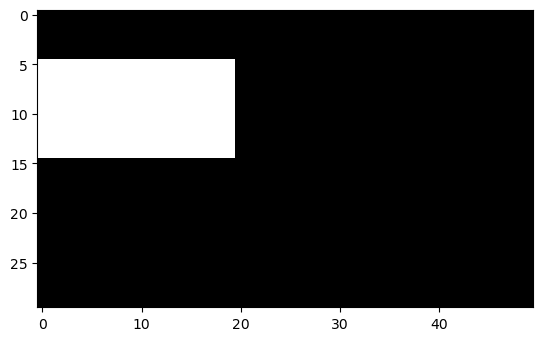

In [30]:
tmp=np.zeros((30,50,3))
ree=np.zeros((10,20,3))
r,c=ree.shape[0],ree.shape[1]
ree[:,:,:]=255
startR,startC=5,0
tmp[startR:startR+r,startC:startC+c,:]=ree

import matplotlib.pyplot as plt
plt.imshow(tmp)

# 9

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame

pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()

gift_image = cv2.imread("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트//.jpg")  # Replace with the actual path to your gift image


max_num_hands = 2
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}

# MediaPipe hands model
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Gesture recognition model
file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)

cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if result.multi_hand_landmarks is not None:
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z]

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                    v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                    v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)



        elapsed_time = time.time() - start_time
        if elapsed_time >= interval:
            start_time = time.time()
            # 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
            right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
            left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}            

            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                right_gesture = rps_result[1]['rps']
                # print('현재 /가위바위보',left_gesture,right_gesture )
                
                # 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                left_gesture_count[left_gesture] += 1
                right_gesture_count[right_gesture] += 1

                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)
        
                                     
        if left_score == 2 or right_score == 2:
            pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
            pygame.mixer.music.stop()
            pygame.mixer.music.play(0, 0.0)

            # print(left_gesture_count["rock"],left_gesture_count["paper"],left_gesture_count["scissors"])
            # print(right_gesture_count["rock"],right_gesture_count["paper"],right_gesture_count["scissors"])       
                           

            # 승리자 표시 및 '가위', '바위', '보' 개수 표시 코드 추가
            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
            cv2.waitKey(30)

            # 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Right Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
                        org=(50, int(img.shape[0] / 2) + 50),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
            cv2.waitKey(30)
            
            # 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Left Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
                        org=(50, int(img.shape[0] / 2) + 100),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
            cv2.waitKey(30)
                

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

# 홈

In [ ]:
# https://www.youtube.com/watch?v=udeQhZHx-00&t=1s

# 10

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pygame
import pandas as pd

##############################################################################################################################
### 음악 큐
pygame.mixer.init()
pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
# pygame.mixer.Sound("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/start-racing.mp3")
pygame.mixer.music.play()


##############################################################################################################################
### 가위, 바위, 보 인식
max_num_hands = 2 
gesture = {
    0: 'fist', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five',
    6: 'six', 7: 'rock', 8: 'spiderman', 9: 'yeah', 10: 'ok',
}
rps_gesture = {0: 'rock', 5: 'paper', 9: 'scissors'}


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands=max_num_hands,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)


file = np.genfromtxt('C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/240108/gesture_train.csv', delimiter=',')
angle = file[:, :-1].astype(np.float32)
label = file[:, -1].astype(np.float32)

##############################################################################################################################
## KNN 최근접 알고리즘 학습
knn = cv2.ml.KNearest_create()
knn.train(angle, cv2.ml.ROW_SAMPLE, label)


## 웹캠으로 읽기
cap = cv2.VideoCapture(0)

left_gesture = None
right_gesture = None
left_score = 0
right_score = 0

start_time = time.time()
interval = 3  # seconds

##############################################################################################################################
### 오른쪽 플레이어와 왼쪽 플레이어의 '가위', '바위', '보' 개수를 추적하는 딕셔너리 초기화
right_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}
left_gesture_count = {"rock": 0, "paper": 0, "scissors": 0}

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        continue

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = hands.process(img)

    ## 각도계산, 제스쳐 인식
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if result.multi_hand_landmarks is not None: # 손 인식
        rps_result = []

        for res in result.multi_hand_landmarks:
            joint = np.zeros((21, 3)) # x,y,z
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z] # 빨간좌표 마다 landmark 저장

            v1 = joint[[0, 1, 2, 3, 0, 5, 6, 7, 0, 9, 10, 11, 0, 13, 14, 15, 0, 17, 18, 19], :]
            v2 = joint[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], :]
            v = v2 - v1
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            angle = np.arccos(np.einsum('nt,nt->n',
                                    v[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18], :],
                                    v[[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19], :]))

            angle = np.degrees(angle)

            data = np.array([angle], dtype=np.float32)


            ## KNN 결과값 저장
            ret, results, neighbours, dist = knn.findNearest(data, 3)
            idx = int(results[0][0])

            if idx in rps_gesture.keys():
                org = (int(res.landmark[0].x * img.shape[1]), int(res.landmark[0].y * img.shape[0]))
                cv2.putText(img, text=rps_gesture[idx].upper(), org=(org[0], org[1] + 20),
                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

                rps_result.append({
                    'rps': rps_gesture[idx],
                    'org': org
                })

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)

        elapsed_time = time.time() - start_time
        if elapsed_time >= interval:
            start_time = time.time()

            if len(rps_result) >= 2:
                left_gesture = rps_result[0]['rps']
                right_gesture = rps_result[1]['rps']

##############################################################################################################################
                ### 각 플레이어의 '가위', '바위', '보' 개수 업데이트
                left_gesture_count[left_gesture] += 1
                right_gesture_count[right_gesture] += 1        
                # print(left_gesture_count,right_gesture_count)


                ### 승자 Score 업데이트
                if left_gesture == 'rock':
                    if right_gesture == 'scissors':
                        left_score += 1
                    elif right_gesture == 'paper':
                        right_score += 1
                elif left_gesture == 'paper':
                    if right_gesture == 'rock':
                        left_score += 1
                    elif right_gesture == 'scissors':
                        right_score += 1
                elif left_gesture == 'scissors':
                    if right_gesture == 'rock':
                        right_score += 1
                    elif right_gesture == 'paper':
                        left_score += 1

        cv2.putText(img, text=f'Left Score: {right_score} | Right Score: {left_score}',
                    org=(50, 50), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=2)
 
 
##############################################################################################################################
        ### 5점 달성했을때 결과 표시 
        if left_score == 2 or right_score == 2:
            pygame.mixer.music.load("C:/Users/jh/OneDrive - 연세대학교 (Yonsei University)/000 취업사관학교/새싹 프로그램) 강의 시작/미니프로젝트/cheer.mp3")
            pygame.mixer.music.stop()
            pygame.mixer.music.play(0, 0.0)

            ### 승리자 표시
            winner = 'Right Player' if left_score == 2 else 'Left Player'
            cv2.putText(img, text=f'{winner} Win!', org=(50, int(img.shape[0] / 2)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
            cv2.waitKey(30)

            ### 오른쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Right Player> Rock: {left_gesture_count["rock"]}, Paper: {left_gesture_count["paper"]}, Scissors: {left_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 50),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
            cv2.waitKey(30)
            
            ### 왼쪽 플레이어의 '가위', '바위', '보' 개수 표시
            cv2.putText(img, text=f'<Left Player> Rock: {right_gesture_count["rock"]}, Paper: {right_gesture_count["paper"]}, Scissors: {right_gesture_count["scissors"]}',
            org=(50, int(img.shape[0] / 2) + 100),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 0, 0), thickness=2)
            cv2.waitKey(30)
                

    cv2.imshow('Game', img)
    if cv2.waitKey(1) == ord('q'):
        break

pygame 2.5.2 (SDL 2.28.3, Python 3.7.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 